<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/AA_GRUPO3/blob/main/AA_PRACTICA2_GRUPO_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


In [2]:
# CARGAMOS EL CONJUNTO DE DATOS MNIST EN KERAS
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)

(60000, 28, 28)


In [3]:
# Vemos la matriz de la imagen número 10 (28x28)
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[9]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0 164  50   0   7   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   1   0   0   1   1   0   0   5   0  45 217 255 176   0   6   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0   3   3   5   9   0   2   0  62 236 231 215  27   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29 244 231 234  74   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0  23  41  59 111 134 138 226 202 217  22   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0  35 179 195 182 225 198 241 177 199 205 210  26   0   1   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0  19   0   0   0   0   0 235 24

In [4]:
# La imagen anterior corresponde con la sandalia (tacón) asociada al número 5. Hasta se puede intuir.... 
train_labels[9]

5

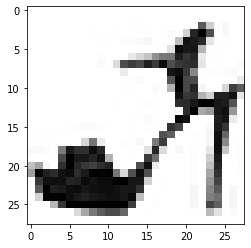

In [5]:
# Veamos el elemento 10 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[9]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
# Normalizamos las imágenes

# Imagenes de entrenamiento.
train_images = train_images.astype('float32') / 255

# Imagenes de test.
test_images = test_images.astype('float32') / 255

## Casos


En esta sección se definen y entrenan los tres casos a estudiar en la práctica.

Nuestro problema de clasificación de prendas será secuencial y tendrá una salida con 10 clases correspondientes a los diez tipos de prendas, independientemente del resto de parámetros utilizados, los cuales iremos variando.

También, estarán formados por capas de neuronas convolucionales, donde los píxeles de entrada se irán recorriendo en función del tamaño de las ventanas aplicado en cada capa.

La capa de salida estará formada por 10 neuronas y por la función de activación 'softmax' para que nos devuelva un vector de distribución de probabilidad sobre las clases que buscamos clasificar.

In [7]:
# Librerías a utilizar para construir los modelos
from keras import models
from keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [8]:
# Definimos variables que van a contener los resultados de los entrenamientos
HISTORY = []
TEST_LOSS = []
TEST_ACC = []

### Caso 1

In [9]:
modelo_1 = Sequential()
modelo_1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelo_1.add(MaxPooling2D((2, 2)))

modelo_1.add(Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelo_1.add(MaxPooling2D((2, 2)))

modelo_1.add(Flatten())
modelo_1.add(Dense(10, activation='softmax'))

modelo_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [10]:
modelo_1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history_m1 = modelo_1.fit(train_images, train_labels,
                      batch_size=100,
                      epochs=5)

HISTORY.append(history_m1)

Epoch 1/5
600/600 [==============================] - 5s 4ms/step - loss: 1.2629 - accuracy: 0.5823
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 0.6847 - accuracy: 0.7469
Epoch 3/5
600/600 [==============================] - 3s 6ms/step - loss: 0.5953 - accuracy: 0.7832
Epoch 4/5
600/600 [==============================] - 3s 5ms/step - loss: 0.5429 - accuracy: 0.8042
Epoch 5/5
600/600 [==============================] - 3s 5ms/step - loss: 0.5029 - accuracy: 0.8201


In [11]:
test_loss_m1, test_acc_m1 = modelo_1.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m1)
TEST_ACC.append(test_acc_m1)

print('Test accuracy:', test_acc_m1)
print('Test loss:', test_loss_m1)

313/313 [==============================] - 1s 3ms/step - loss: 0.5170 - accuracy: 0.8154
Test accuracy: 0.8154000043869019
Test loss: 0.5169611573219299


### Caso 2

In [12]:
modelo_2 = Sequential()
modelo_2.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1)))
modelo_2.add(MaxPooling2D((2, 2)))

modelo_2.add(Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
modelo_2.add(MaxPooling2D((2, 2)))

modelo_2.add(Flatten())
modelo_2.add(Dense(65, activation='relu'))
modelo_2.add(Dense(10, activation='softmax'))

modelo_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 65)               

In [13]:
modelo_2.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history_m2 = modelo_2.fit(train_images, train_labels,
                          batch_size=100,
                          epochs=5)

HISTORY.append(history_m2)

Epoch 1/5
600/600 [==============================] - 3s 5ms/step - loss: 1.2496 - accuracy: 0.5716
Epoch 2/5
600/600 [==============================] - 3s 4ms/step - loss: 0.7361 - accuracy: 0.7258
Epoch 3/5
600/600 [==============================] - 3s 4ms/step - loss: 0.6463 - accuracy: 0.7575
Epoch 4/5
600/600 [==============================] - 3s 4ms/step - loss: 0.5906 - accuracy: 0.7807
Epoch 5/5
600/600 [==============================] - 3s 4ms/step - loss: 0.5497 - accuracy: 0.7968


In [14]:
test_loss_m2, test_acc_m2 = modelo_2.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m2)
TEST_ACC.append(test_acc_m2)

print('Test accuracy:', test_acc_m2)
print('Test loss:', test_loss_m2)

313/313 [==============================] - 1s 3ms/step - loss: 0.5842 - accuracy: 0.7637
Test accuracy: 0.763700008392334
Test loss: 0.5842481255531311


### Caso 3

In [15]:
modelo_3 = Sequential()
modelo_3.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1)))
modelo_3.add(MaxPooling2D((2, 2)))

modelo_3.add(Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
modelo_3.add(MaxPooling2D((2, 2)))

modelo_3.add(Flatten())
modelo_3.add(Dense(65, activation='relu'))
modelo_3.add(Dense(10, activation='softmax'))

modelo_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 65)               

In [16]:
model_3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_m3 = model_3.fit(train_images, train_labels,
                      batch_size=100,
                      epochs=5)

HISTORY.append(history_m3)

Epoch 1/5
600/600 [==============================] - 3s 5ms/step - loss: 0.5522 - accuracy: 0.7994
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 0.3590 - accuracy: 0.8707
Epoch 3/5
600/600 [==============================] - 3s 5ms/step - loss: 0.3111 - accuracy: 0.8855
Epoch 4/5
600/600 [==============================] - 3s 4ms/step - loss: 0.2825 - accuracy: 0.8971
Epoch 5/5
600/600 [==============================] - 3s 5ms/step - loss: 0.2604 - accuracy: 0.9042


In [17]:
test_loss_m3, test_acc_m3 = model_3.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m3)
TEST_ACC.append(test_acc_m3)

print('Test accuracy:', test_acc_m3)
print('Test loss:', test_loss_m3)

313/313 [==============================] - 1s 3ms/step - loss: 0.2953 - accuracy: 0.8934
Test accuracy: 0.8934000134468079
Test loss: 0.29532110691070557


### Variantes

#### Caso 1. Variante 1

In [18]:
#Partición del conjunto de datos de entrenamiento
split = 0.25

index = int(len(train_images) * split) # índice a partir del cual se realiza la partición

# Partición imágenes
train_val = train_images[:index]
train_train = train_images[index:]

# Partición etiquetas one-hot encoded
train_labels_val = train_labels[:index]
train_train_labels = train_labels[index:]

In [19]:
model_1_variante_1 = Sequential()
model_1_variante_1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_1_variante_1.add(MaxPooling2D((2, 2)))

model_1_variante_1.add(Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_1_variante_1.add(MaxPooling2D((2, 2)))

model_1_variante_1.add(Flatten())
model_1_variante_1.add(Dense(10, activation='softmax'))

model_1_variante_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [20]:
model_1_variante_1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history_m1_v_1 = model_1_variante_1.fit(train_images, train_labels,
                      batch_size=100,
                      epochs=25,
                      validation_data = (train_val, train_labels_val))

HISTORY.append(history_m1_v_1)

Epoch 1/25
600/600 [==============================] - 3s 4ms/step - loss: 1.2340 - accuracy: 0.5807 - val_loss: 0.7640 - val_accuracy: 0.7245
Epoch 2/25
600/600 [==============================] - 2s 4ms/step - loss: 0.6895 - accuracy: 0.7471 - val_loss: 0.6115 - val_accuracy: 0.7781
Epoch 3/25
600/600 [==============================] - 2s 4ms/step - loss: 0.5948 - accuracy: 0.7824 - val_loss: 0.5518 - val_accuracy: 0.7967
Epoch 4/25
600/600 [==============================] - 2s 4ms/step - loss: 0.5422 - accuracy: 0.8040 - val_loss: 0.5249 - val_accuracy: 0.8084
Epoch 5/25
600/600 [==============================] - 3s 5ms/step - loss: 0.5042 - accuracy: 0.8207 - val_loss: 0.4774 - val_accuracy: 0.8315
Epoch 6/25
600/600 [==============================] - 2s 4ms/step - loss: 0.4766 - accuracy: 0.8314 - val_loss: 0.4519 - val_accuracy: 0.8385
Epoch 7/25
600/600 [==============================] - 2s 4ms/step - loss: 0.4564 - accuracy: 0.8389 - val_loss: 0.4359 - val_accuracy: 0.8479
Epoch 

In [21]:
test_loss_m1_v1, test_acc_m1_v1 = model_1_variante_1.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m1_v1)
TEST_ACC.append(test_acc_m1_v1)

print('Test accuracy:', test_acc_m1_v1)
print('Test loss:', test_loss_m1_v1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3499 - accuracy: 0.8768
Test accuracy: 0.876800000667572
Test loss: 0.3498806953430176


### Caso 1. Variante 2.

In [22]:
model_1_variante_2 = Sequential()
model_1_variante_2.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
model_1_variante_2.add(MaxPooling2D((2, 2)))

model_1_variante_2.add(Conv2D(64, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
model_1_variante_2.add(MaxPooling2D((2, 2)))

model_1_variante_2.add(Flatten())
model_1_variante_2.add(Dense(10, activation='softmax'))

model_1_variante_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [23]:
model_1_variante_2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history_m1_v_2 = model_1_variante_2.fit(train_images, train_labels,
                      batch_size=100,
                      epochs=5)

HISTORY.append(history_m1_v_2)

Epoch 1/5
600/600 [==============================] - 3s 4ms/step - loss: 1.0887 - accuracy: 0.6539
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.6651 - accuracy: 0.7589
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5873 - accuracy: 0.7863
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5398 - accuracy: 0.8047
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5055 - accuracy: 0.8195


In [24]:
test_loss_m1_v2, test_acc_m1_v2 = model_1_variante_2.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m1_v2)
TEST_ACC.append(test_acc_m1_v2)

print('Test accuracy:', test_acc_m1_v2)
print('Test loss:', test_loss_m1_v2)

313/313 [==============================] - 1s 3ms/step - loss: 0.5162 - accuracy: 0.8123
Test accuracy: 0.8123000264167786
Test loss: 0.516233503818512


## Funciones para graficar

In [28]:
# Curvas de aprendizaje
"""
Notas: Los elementos de HISTORY son diccionarios que contienen los nombres de las métricas como claves 
y sus valores (.values()) son listas con los valores de las métricas durante el entrenamiento model.fit
"""
def curvas_aprendizaje(HISTORY, nfilas, ncol, size = (18,10), title = []):
    # Función para imprimir las curvas de aprendizaje en una rejilla de nfilas x ncol
    # Argumentos: HISTORY = Lista con variables history de keras (obtenidas de model.fit)
    #        nfilas, ncol = Nº de filas y columnas de la rejilla
    #                size = Tamaño total de la rejilla (por defecto es (18,10))
    # !Importante: El nº total de filas x col debe ser superiror al de los elementos pasados como argumento en HISTORY
    if len(HISTORY) > nfilas*ncol:
        print("Error. Dimensiones incompatibles")
        return 0
    else:
        fig = plt.figure(figsize=size) # Especifica tamaño de la figura

        for i, registro in enumerate(HISTORY):

            plt.subplot(nfilas, ncol, i+1) # Añade subplot (gráfica para un modelo)
            if title:
              plt.title(title[i])
            else:
              plt.title("Modelo " + str(i+1)) # Formato de cada gráfica
            plt.xlabel('Épocas')
            plt.ylim((0,2))

            acc = registro.history['accuracy']
            loss = registro.history['loss']

            x = list(range(1, len(acc) + 1))

            plt.plot(x,loss, 'o-') # Imprime 
            plt.plot(x, acc, 'o-')

            plt.xticks(x)
            plt.legend(list(registro.history.keys()))
            plt.text(len(x), loss[len(loss)-1], str(round(loss[len(loss)-1],3))) # Valor punto final  loss
            plt.text(len(x), acc[len(acc)-1], str(round(acc[len(acc)-1],3))) # Valor punto final  loss

    fig.tight_layout()
    plt.show()


# Entrenamiento-validacion
def entrenamiento_validacion(HISTORY, nfilas, ncol, title, size = (18,10)):
  if len(HISTORY) < nfilas*ncol:
    print("Error. Dimensiones incompatibles")
    return 0
  else:
    fig = plt.figure(figsize=size) # Especifica tamaño de la figura

  for i, history in enumerate(HISTORY):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.subplot(nfilas, ncol, i+1)

    # "bo" es para "punto azun"
    plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
    # "b" es para "linea continua azul"
    plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
    plt.title(title[i])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

  plt.show()



# Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

def show_confusion_matrix(predictions):
    # Predicción de valores desde el dataset de validación
    Y_pred = predictions
    # Convertir en predicciones de clases desde los vectores one-hot encoding 
    Y_pred_classes = np.argmax(Y_pred, axis = 1) 
    # Convertir en clases de observación desde los vectores one-hot encoding
    Y_true = np.argmax(test_labels, axis = 1) 
    # Computar la matriz de confusión
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # Dibujar la matriz de confusión
    plot_confusion_matrix(confusion_mtx, classes = range(10))

# Prediction distributions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)    

    predicted_label = np.argmax(predictions_array)
    if predicted_label.all() == true_label.all():
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                  100*np.max(predictions_array),
                                  true_label),
                                  color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('black')

def show_predicted_distributions(predictions, n):
    Y_true = np.argmax(test_labels, axis = 1)
    for i in range(n):
      plt.figure(figsize=(6,3))
      plt.subplot(1,2,1)
      plot_image(i, predictions[i], Y_true, test_images.reshape(10000,28,28))
      plt.subplot(1,2,2)
      plot_value_array(i, predictions[i],  Y_true)
      plt.show()
      plt.clf()

def show_single_predicted_dist(predictions, i, title):
      Y_true = np.argmax(test_labels, axis = 1)
      plt.figure(figsize=(6,3))
      plt.subplot(1,2,1)
      plot_image(i, predictions[i], Y_true, test_images.reshape(10000,28,28))
      plt.subplot(1,2,2)
      plot_value_array(i, predictions[i],  Y_true)

      plt.title(title)
      plt.tight_layout()
      plt.show()



# Gráfico de barras horizontales
def testerror_testacc(ERROR, ACC, titles, size = (12,12)):
    fig = plt.figure(figsize=size) # Especifica tamaño de la figura

    # Ordena pérdida en orden ascendente y precisión en orden descendente
    sorted_err = dict(zip(titles, ERROR))
    sorted_err = dict(sorted(sorted_err.items(), key = lambda x: x[1], reverse=True)) 

    sorted_acc = dict(zip(titles, ACC))
    sorted_acc = dict(sorted(sorted_acc.items(), key = lambda x: x[1])) 

    # Gráfica
    plt.subplot(1, 2, 1)
    plt.barh(list(sorted_err.keys()), list(sorted_err.values()))
    plt.title('Test error')

    plt.subplot(1,2,2)
    plt.barh(list(sorted_acc.keys()), list(sorted_acc.values()), color='orange')
    plt.title('Test accuracy')

    fig.tight_layout()
    plt.show()

## Predicciones

In [30]:
predictions1 = model_1.predict(test_images)
predictions2 = model_2.predict(test_images) 
predictions3 = model_3.predict(test_images)

313/313 [==============================] - 1s 2ms/step


### Matrices de confusión

In [36]:
# Modelo 1
# HAY QUE CAMBIAR LAS FUNCIONES (TENEMOS MATRICES, NO VECTORES) 
# show_confusion_matrix(predictions1)

In [ ]:
# Modelo 2
# show_confusion_matrix(predictions2)

In [37]:
# Predicciones de las 10 primeras imagenes de test
# Modelo 1 show_predicted_distributions(predictions1, 2)